In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("/home/shanky/Desktop/flowers/flowers"))
from imageio import imread
# import PIL
# from skimage.transform import resize
# from skimage import color
import skimage
from skimage.transform import resize
import sklearn
from matplotlib import pyplot as plt
# Any results you write to the current directory are saved as output.
from keras.models import Sequential
from keras.layers import Conv2D,BatchNormalization,Flatten,Dense,Dropout,MaxPooling2D,Activation
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix

['dandelion', 'rose', 'daisy', 'sunflower', 'tulip']


Using TensorFlow backend.
/home/shanky/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/shanky/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/shanky/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/shanky/anaconda3/lib/python3.6/site-packages/tenso

In [2]:
dirList=os.listdir('/home/shanky/Desktop/flowers/flowers')
imageData=[]
imageLabel=[]
validExtensionsList=['jpg','tif','png','bmp']
for d in dirList:
    print('Processing...',d)
    for f in os.listdir('/home/shanky/Desktop/flowers/flowers/'+d):
        ext=f.split('.')[-1]
        if ext in validExtensionsList:
            data=imread('/home/shanky/Desktop/flowers/flowers/'+d+'/'+f)
            #color.rgb2gray(imread('../input/flowers/flowers/'+d+'/'+f))
            resized_data=skimage.transform.resize(data,(100,100))
            imageData.append(resized_data)
            imageLabel.append(d)
        else:
            pass
print('DONE!')

Processing... dandelion
Processing... rose
Processing... daisy
Processing... sunflower
Processing... tulip
DONE!


In [3]:
np.shape(imageData),np.shape(imageLabel)

((4323, 100, 100, 3), (4323,))

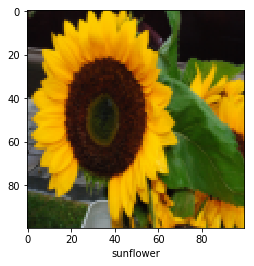

In [4]:
idx=np.random.randint(len(imageData))
plt.imshow(imageData[idx])
plt.xlabel(imageLabel[idx])
plt.show()

In [5]:
X=np.array(imageData)
X=X.reshape(X.shape[0],X.shape[1],X.shape[2],3)
y=np.array(imageLabel)
num_classes=len(set(y))
le=LabelEncoder()
y=le.fit_transform(y)
y=to_categorical(num_classes=num_classes,y=y)
input_shape=(X.shape[1],X.shape[2],X.shape[3])

In [6]:
np.shape(X),np.shape(y)

((4323, 100, 100, 3), (4323, 5))

In [7]:
# # modelling starts using a CNN.

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (100,100,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation = "softmax"))

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 100, 100, 32)      2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 25, 25, 96)        55392     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 96)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 96)        83040     
__________

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)
np.shape(X_train),np.shape(y_train),np.shape(X_test),np.shape(y_test),np.shape(X_val),np.shape(y_val)

((2766, 100, 100, 3),
 (2766, 5),
 (865, 100, 100, 3),
 (865, 5),
 (692, 100, 100, 3),
 (692, 5))

In [11]:
epochs=2
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])
#model.fit_generator(datagen.flow(X_train, y_train),validation_data=(X_val,y_val),steps_per_epoch=len(X_train) / 10, epochs=epochs,verbose=1)
hist=model.fit(X_train,y_train,validation_data=(X_val,y_val),batch_size=50,epochs=epochs,verbose=1)

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Train on 2766 samples, validate on 692 samples
Epoch 1/1
2766/2766 [==============================] - 64s - loss: 1.3544 - acc: 0.3970 - val_loss: 1.2009 - val_acc: 0.5202


In [29]:
hist.params

{'batch_size': 50,
 'epochs': 1,
 'samples': 2766,
 'verbose': 1,
 'do_validation': True,
 'metrics': ['loss', 'acc', 'val_loss', 'val_acc']}

In [12]:
model.evaluate(X_test,y_test)

864/865 [============================>.] - ETA: 0s

[1.188098704194747, 0.522543352601156]

In [62]:
rounded_predictions = model.predict_classes(X_test)
rounded_predictions[1]

864/865 [============================>.] - ETA: 0s

2

In [63]:
rounded_labels=np.argmax(y_test, axis=1)
rounded_labels[1]

2

In [64]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(rounded_labels, rounded_predictions)
cm

array([[ 78,  21,  19,  10,  24],
       [ 37,  85,  14,  46,  23],
       [ 10,   6,  63,   7,  74],
       [ 14,   4,   2,  98,  33],
       [  7,   9,  39,  14, 128]])

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(rounded_labels,rounded_predictions)

0.522543352601156

Actual: ['daisy']  Predicted: ['rose']


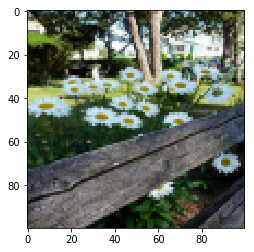

In [67]:
idxtest=np.random.randint(len(X_test))
testImg=X_test[idxtest]
plt.imshow(testImg,cmap='gray')
# testImg=testImg.reshape(1,100,100,3)
pred = le.inverse_transform([rounded_predictions[idxtest]])
actual = le.inverse_transform([rounded_labels[idxtest]])
print("Actual:",actual," Predicted:",pred)
plt.show()